### MRI Brain Image Classification


In [112]:
# import the all libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers, models
import os
import keras
from keras.layers.core import Dropout
import cv2
import PIL
from tensorflow.keras.models import Sequential
from keras.regularizers import l2
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from keras.applications.inception_v3 import InceptionV3
import tensorflow as tf
import matplotlib.pyplot as plt

In [4]:
# gpu 
gpus=tf.config.experimental.list_physical_devices('CPU')
gpus

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]

In [5]:
#Avoid Out of memory  error by settig Gpu Memory Consumption Growth
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu,True)

## Load the Data 

In [6]:
#Load the data 
data_dir = "data"


In [7]:
#check the data_dir 
check_len = os.listdir(data_dir)
len(check_len)# 44 classes
print(check_len)

['Astrocitoma T1', 'Astrocitoma T1C+', 'Astrocitoma T2', 'Carcinoma T1', 'Carcinoma T1C+', 'Carcinoma T2', 'Ependimoma T1', 'Ependimoma T1C+', 'Ependimoma T2', 'Ganglioglioma T1', 'Ganglioglioma T1C+', 'Ganglioglioma T2', 'Germinoma T1', 'Germinoma T1C+', 'Germinoma T2', 'Glioblastoma T1', 'Glioblastoma T1C+', 'Glioblastoma T2', 'Granuloma T1', 'Granuloma T1C+', 'Granuloma T2', 'Meduloblastoma T1', 'Meduloblastoma T1C+', 'Meduloblastoma T2', 'Meningioma T1', 'Meningioma T1C+', 'Meningioma T2', 'Neurocitoma T1', 'Neurocitoma T1C+', 'Neurocitoma T2', 'Oligodendroglioma T1', 'Oligodendroglioma T1C+', 'Oligodendroglioma T2', 'Papiloma T1', 'Papiloma T1C+', 'Papiloma T2', 'Schwannoma T1', 'Schwannoma T1C+', 'Schwannoma T2', 'Tuberculoma T1', 'Tuberculoma T1C+', 'Tuberculoma T2', '_NORMAL T1', '_NORMAL T2']


In [8]:
class_names=check_len#here we given the class names

In [9]:
class_names#print the class names

['Astrocitoma T1',
 'Astrocitoma T1C+',
 'Astrocitoma T2',
 'Carcinoma T1',
 'Carcinoma T1C+',
 'Carcinoma T2',
 'Ependimoma T1',
 'Ependimoma T1C+',
 'Ependimoma T2',
 'Ganglioglioma T1',
 'Ganglioglioma T1C+',
 'Ganglioglioma T2',
 'Germinoma T1',
 'Germinoma T1C+',
 'Germinoma T2',
 'Glioblastoma T1',
 'Glioblastoma T1C+',
 'Glioblastoma T2',
 'Granuloma T1',
 'Granuloma T1C+',
 'Granuloma T2',
 'Meduloblastoma T1',
 'Meduloblastoma T1C+',
 'Meduloblastoma T2',
 'Meningioma T1',
 'Meningioma T1C+',
 'Meningioma T2',
 'Neurocitoma T1',
 'Neurocitoma T1C+',
 'Neurocitoma T2',
 'Oligodendroglioma T1',
 'Oligodendroglioma T1C+',
 'Oligodendroglioma T2',
 'Papiloma T1',
 'Papiloma T1C+',
 'Papiloma T2',
 'Schwannoma T1',
 'Schwannoma T1C+',
 'Schwannoma T2',
 'Tuberculoma T1',
 'Tuberculoma T1C+',
 'Tuberculoma T2',
 '_NORMAL T1',
 '_NORMAL T2']

## PreProcessing And Split the data into Train , Validation and Test  Data

In [10]:
#Generates a tf.Data.Dataset from image files in a directory
tf.keras.utils.image_dataset_from_directory(
    data_dir,
    labels='inferred',
    label_mode='categorical',
    class_names=class_names,
    color_mode='grayscale',
    batch_size=32,
    image_size=(256, 256),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation='bilinear',
    follow_links=False,
    crop_to_aspect_ratio=False,
)

Found 4477 files belonging to 44 classes.


<_BatchDataset element_spec=(TensorSpec(shape=(None, 256, 256, 1), dtype=tf.float32, name=None), TensorSpec(shape=(None, 44), dtype=tf.float32, name=None))>

In [11]:
#load data using  a keras utility
batch_size = 32
img_height = 180
img_width = 180

In [12]:
#creating the training dataset
train_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,  
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 4477 files belonging to 44 classes.
Using 3582 files for training.


In [13]:
#creating the validation dataset
val_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,  
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 4477 files belonging to 44 classes.
Using 895 files for validation.


In [14]:
# creating test data 
val_batches = tf.data.experimental.cardinality(val_ds)
print('number of validation batches : %d' % tf.data.experimental.cardinality(val_ds))

number of validation batches : 28


In [15]:
#considering the 20% of data from validation data
test_ds = val_ds.take(val_batches//5)
val_ds = val_ds.skip(val_batches //5)

In [16]:
print('Number of test batches: %d' % tf.data.experimental.cardinality(test_ds))

Number of test batches: 5


In [17]:
print('number of validation batches : %d' % tf.data.experimental.cardinality(val_ds))

number of validation batches : 23


In [18]:
#now see the class names attributes on these datasets
class_names = train_ds.class_names
print(class_names)

['Astrocitoma T1', 'Astrocitoma T1C+', 'Astrocitoma T2', 'Carcinoma T1', 'Carcinoma T1C+', 'Carcinoma T2', 'Ependimoma T1', 'Ependimoma T1C+', 'Ependimoma T2', 'Ganglioglioma T1', 'Ganglioglioma T1C+', 'Ganglioglioma T2', 'Germinoma T1', 'Germinoma T1C+', 'Germinoma T2', 'Glioblastoma T1', 'Glioblastoma T1C+', 'Glioblastoma T2', 'Granuloma T1', 'Granuloma T1C+', 'Granuloma T2', 'Meduloblastoma T1', 'Meduloblastoma T1C+', 'Meduloblastoma T2', 'Meningioma T1', 'Meningioma T1C+', 'Meningioma T2', 'Neurocitoma T1', 'Neurocitoma T1C+', 'Neurocitoma T2', 'Oligodendroglioma T1', 'Oligodendroglioma T1C+', 'Oligodendroglioma T2', 'Papiloma T1', 'Papiloma T1C+', 'Papiloma T2', 'Schwannoma T1', 'Schwannoma T1C+', 'Schwannoma T2', 'Tuberculoma T1', 'Tuberculoma T1C+', 'Tuberculoma T2', '_NORMAL T1', '_NORMAL T2']


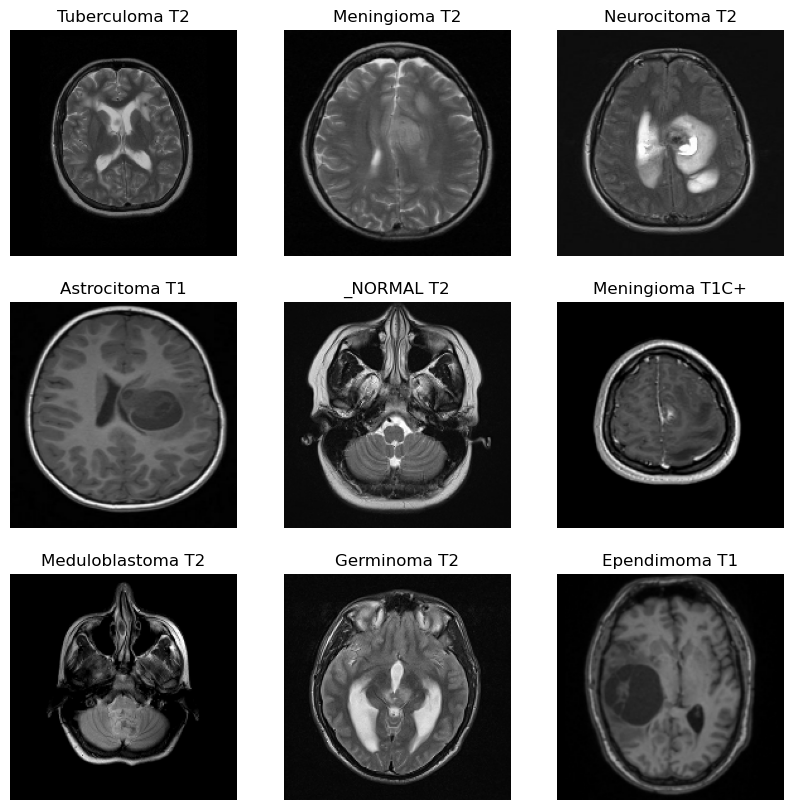

In [19]:
#Visualize the data
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [20]:
#Resize and Rescaling the images 
img_size=180
resize_and_rescale = tf.keras.Sequential([layers.Resizing(img_size,img_size),
                                          layers.Rescaling(1./255)
                                         ])

In [21]:
normalized_ds = train_ds.map(lambda x, y: (resize_and_rescale(x), y))
image_batch, labels_batch = next(iter(normalized_ds))
first_image = image_batch[0]
# Notice the pixel values are now in `[0,1]`.
print(np.min(first_image), np.max(first_image))

0.0 1.0


In [22]:
# let see shape 
for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break
#(32, 180, 180, 3) =  This is a batch of 32 images of shape 180x180x3 (the last dimension refers to color channels RGB).

(32, 180, 180, 3)
(32,)


## CNN Modelbuilding 

In [23]:
#Creating the model
num_classes =len(class_names)#44 classes

In [47]:
model = Sequential([ 
  layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu',kernel_regularizer=l2(0.01)),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),  
  layers.Conv2D(32, 3, padding='same', activation='relu',kernel_regularizer=l2(0.01)),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),  
  layers.Conv2D(64, 3, padding='same', activation='relu',kernel_regularizer=l2(0.01)),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),  
  layers.Flatten(),
  layers.Dense(128, activation='relu',kernel_initializer='he_normal'),
  layers.Dense(num_classes)
])

In [48]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [49]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_3 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_6 (Conv2D)           (None, 180, 180, 16)      448       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 90, 90, 16)       0         
 2D)                                                             
                                                                 
 dropout_3 (Dropout)         (None, 90, 90, 16)        0         
                                                                 
 conv2d_7 (Conv2D)           (None, 90, 90, 32)        4640      
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 45, 45, 32)       0         
 2D)                                                  

## CallBacks and EarlyStopping

In [27]:
#Train data 
logdir = 'logs'

In [28]:
#using callbacks
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [29]:
#Early stopping 
Early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=2)

In [30]:
#Learning Rate scheduler
def scheduler(epoch, lr):
  if epoch < 10:
    return lr
  else:
    return lr * tf.math.exp(-0.1)

In [31]:
#Learning rate
LearningRate_sch = tf.keras.callbacks.LearningRateScheduler(scheduler)

In [34]:
#ReduceLRonplateau
reduce_lrp =tf.keras.callbacks.ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.1,
    patience=3,
    verbose=0,
    mode='auto',
    min_delta=0.0001,
    cooldown=0,
    min_lr=0,
    
)

In [50]:
hist = model.fit(train_ds,epochs=20,validation_data=val_ds,callbacks=[tensorboard_callback,Early_stopping,LearningRate_sch,reduce_lrp])

Epoch 1/20
112/112 [==============================] - 60s 528ms/step - loss: 3.4558 - accuracy: 0.2225 - val_loss: 2.5286 - val_accuracy: 0.4299 - lr: 0.0010
Epoch 2/20
112/112 [==============================] - 65s 578ms/step - loss: 1.7724 - accuracy: 0.6002 - val_loss: 1.5404 - val_accuracy: 0.6422 - lr: 0.0010
Epoch 3/20
112/112 [==============================] - 65s 578ms/step - loss: 1.0572 - accuracy: 0.7652 - val_loss: 1.1645 - val_accuracy: 0.7456 - lr: 0.0010
Epoch 4/20
112/112 [==============================] - 66s 585ms/step - loss: 0.7275 - accuracy: 0.8428 - val_loss: 1.0295 - val_accuracy: 0.7878 - lr: 0.0010
Epoch 5/20
112/112 [==============================] - 88s 785ms/step - loss: 0.5233 - accuracy: 0.9006 - val_loss: 0.8837 - val_accuracy: 0.8177 - lr: 0.0010
Epoch 6/20
112/112 [==============================] - 83s 733ms/step - loss: 0.4375 - accuracy: 0.9202 - val_loss: 0.7878 - val_accuracy: 0.8422 - lr: 0.0010
Epoch 7/20
112/112 [==============================] 

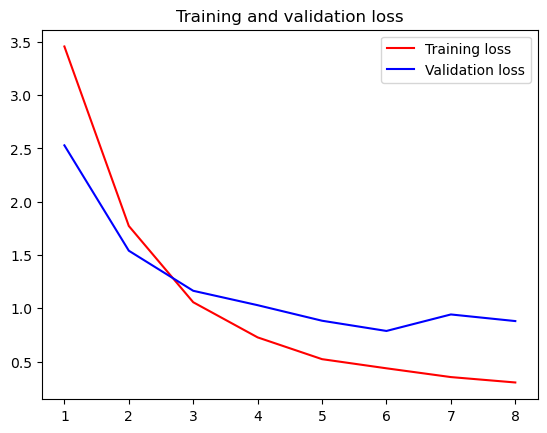

In [51]:
#let see the training  validation loss
epochs = range(1, len(hist.history["loss"]) + 1)
loss = hist.history["loss"]
val_loss = hist.history["val_loss"]
plt.figure()
plt.plot(epochs, loss, "r", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()

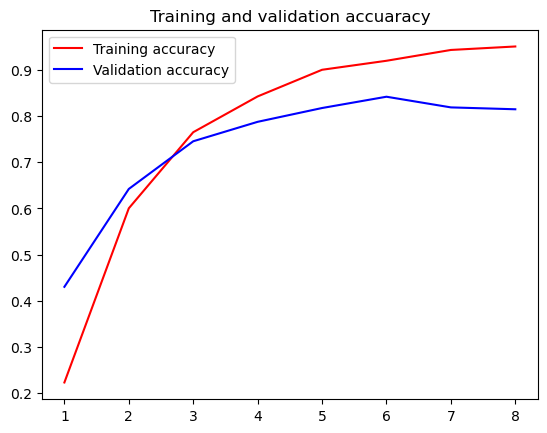

In [52]:
#let see the training  validation accuracy  
epochs = range(1, len(hist.history["accuracy"]) + 1)
loss = hist.history["accuracy"]
val_loss = hist.history["val_accuracy"]
plt.figure()
plt.plot(epochs, loss, "r", label="Training accuracy")
plt.plot(epochs, val_loss, "b", label="Validation accuracy")
plt.title("Training and validation accuaracy")
plt.legend()

## Transfer Learning Using MobileNetV2

In [64]:
# now using the pretrain model
img_size = 180 
# Define IMG_SHAPE as a tuple with a single integer
img_shape = (img_size, img_size, 3)
# Create the base model from the pre-trained model MobileNet V2
base_model = tf.keras.applications.MobileNetV2(
    input_shape=img_shape,
    include_top=False,
    weights='imagenet'
)

In [65]:
#this feature extractor converts each 180*180*3 image into 6*6*1280 block of features
image_batch ,label_batch = next(iter(train_ds))
feature_batch = base_model(image_batch)
print(feature_batch.shape)

(32, 6, 6, 1280)


In [66]:
##feature extraction
base_model.trainable = False#It is important to freeze the convolutional base before you compile and train the model.

In [67]:
#let see model summary 
base_model.summary()

Model: "mobilenetv2_1.00_224"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 180, 180, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv1 (Conv2D)                 (None, 90, 90, 32)   864         ['input_2[0][0]']                
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 90, 90, 32)   128         ['Conv1[0][0]']                  
                                                                                                  
 Conv1_relu (ReLU)              (None, 90, 90, 32)   0           ['bn_Conv1[0][

In [68]:
#now add the classification head 
# tf.keras.layers.GlobalAveragePooling2D layer to convert the features to a single 1280-element vector per image
global_average_layer = tf.keras.layers.GlobalAveragePooling2D()
feature_batch_average = global_average_layer(feature_batch)
print(feature_batch_average.shape)

(32, 1280)


In [69]:
# Apply a tf.keras.layers.Dense layer to convert these features into a single prediction per image.
prediction_layer = tf.keras.layers.Dense(num_classes)
# Apply the Dense layer to the features
predictions = prediction_layer(feature_batch_average)
print(predictions.shape)

(32, 44)


In [70]:
preprocess_input = tf.keras.applications.mobilenet_v2.preprocess_input

In [71]:
#build the model
inputs = tf.keras.Input(shape=(180, 180, 3))
x= preprocess_input(inputs)
x = base_model(x, training=False)
x = global_average_layer(x)
outputs = prediction_layer(x)
model = tf.keras.Model(inputs, outputs)

In [72]:
#model summary
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 180, 180, 3)]     0         
                                                                 
 tf.math.truediv (TFOpLambda  (None, 180, 180, 3)      0         
 )                                                               
                                                                 
 tf.math.subtract (TFOpLambd  (None, 180, 180, 3)      0         
 a)                                                              
                                                                 
 mobilenetv2_1.00_224 (Funct  (None, 6, 6, 1280)       2257984   
 ional)                                                          
                                                                 
 global_average_pooling2d_2   (None, 1280)             0         
 (GlobalAveragePooling2D)                                    

In [73]:
#compile the  model
base_learning_rate = 0.0001
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=base_learning_rate),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=[tf.keras.metrics.SparseCategoricalAccuracy(name='accuracy')])

In [74]:
intial_epochs=20
loss , accuracy = model.evaluate(val_ds)

23/23 [==============================] - 18s 660ms/step - loss: 4.4957 - accuracy: 0.0177


In [75]:
print("initial loss: {:.2f}".format(loss))
print("initial accuracy: {:.2f}".format(accuracy))

initial loss: 4.50
initial accuracy: 0.02


In [76]:
initial_epochs=20
history = model.fit(train_ds,
                    epochs=initial_epochs,
                    validation_data=val_ds)

Epoch 1/20
112/112 [==============================] - 97s 813ms/step - loss: 3.6167 - accuracy: 0.0930 - val_loss: 3.2221 - val_accuracy: 0.1401
Epoch 2/20
112/112 [==============================] - 88s 786ms/step - loss: 2.9047 - accuracy: 0.2194 - val_loss: 2.7194 - val_accuracy: 0.2707
Epoch 3/20
112/112 [==============================] - 91s 813ms/step - loss: 2.4939 - accuracy: 0.3389 - val_loss: 2.4468 - val_accuracy: 0.3333
Epoch 4/20
112/112 [==============================] - 90s 804ms/step - loss: 2.2034 - accuracy: 0.4204 - val_loss: 2.2162 - val_accuracy: 0.4150
Epoch 5/20
112/112 [==============================] - 90s 803ms/step - loss: 1.9868 - accuracy: 0.4841 - val_loss: 2.0754 - val_accuracy: 0.4653
Epoch 6/20
112/112 [==============================] - 85s 759ms/step - loss: 1.8172 - accuracy: 0.5282 - val_loss: 1.9669 - val_accuracy: 0.4993
Epoch 7/20
112/112 [==============================] - 85s 760ms/step - loss: 1.6804 - accuracy: 0.5662 - val_loss: 1.8440 - val_ac

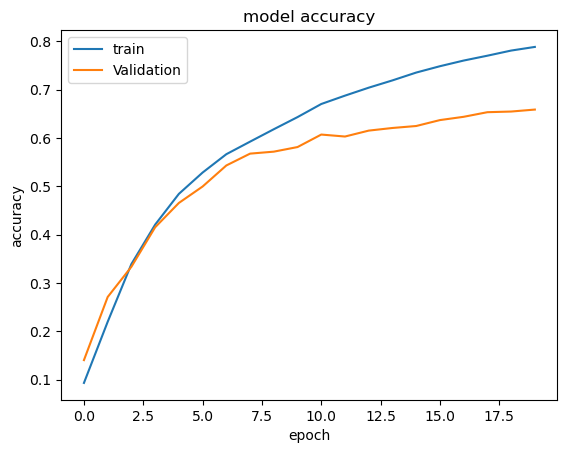

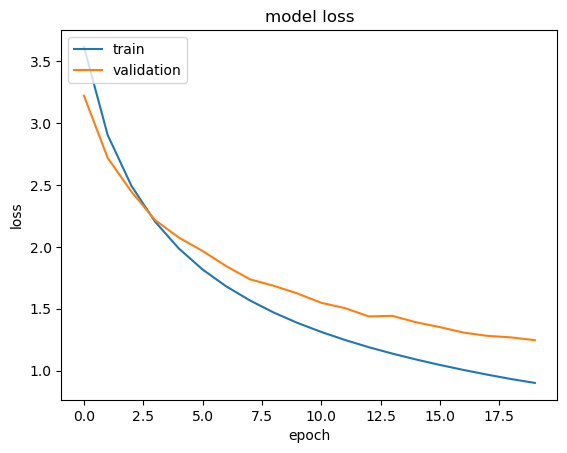

In [ ]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'Validation'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

## Fine Tuning

In [84]:
# Fine tuning 
base_model.trainable = True

In [85]:
# Let's take a look to see how many layers are in the base model
print("Number of layers in the base model: ", len(base_model.layers))

Number of layers in the base model:  154


In [86]:
# Fine-tune from this layer onwards
fine_tune_at = 100
# Freeze all the layers before the `fine_tune_at` layer
for layer in base_model.layers[:fine_tune_at]:
  layer.trainable = False

In [88]:
#compile the model
# use a lower learing rate at this stage other wise your model could overfit very quickly
model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              optimizer = tf.keras.optimizers.Adam(learning_rate=base_learning_rate/10),
              metrics=[tf.keras.metrics.SparseCategoricalAccuracy(name='accuracy')])

In [89]:
#model summary 
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 180, 180, 3)]     0         
                                                                 
 tf.math.truediv (TFOpLambda  (None, 180, 180, 3)      0         
 )                                                               
                                                                 
 tf.math.subtract (TFOpLambd  (None, 180, 180, 3)      0         
 a)                                                              
                                                                 
 mobilenetv2_1.00_224 (Funct  (None, 6, 6, 1280)       2257984   
 ional)                                                          
                                                                 
 global_average_pooling2d_2   (None, 1280)             0         
 (GlobalAveragePooling2D)                                    

In [103]:
len(model.trainable_variables)#56

56

In [96]:
#if you trained to convergence earlier , this step will improve your accuracy by few percentage points
fine_tune_epochs =10
total_epochs = initial_epochs+ fine_tune_epochs
history_fine = model.fit(train_ds,
                         epochs= total_epochs,
                         initial_epoch = history.epoch[-1],
                         validation_data = val_ds,callbacks=[tensorboard_callback,Early_stopping,LearningRate_sch,reduce_lrp] )

Epoch 20/30
112/112 [==============================] - 91s 807ms/step - loss: 0.0271 - accuracy: 0.9969 - val_loss: 0.5965 - val_accuracy: 0.8408 - lr: 9.0484e-06
Epoch 21/30
112/112 [==============================] - 95s 848ms/step - loss: 0.0221 - accuracy: 0.9978 - val_loss: 0.6217 - val_accuracy: 0.8435 - lr: 8.1873e-06
Epoch 22/30
112/112 [==============================] - 94s 835ms/step - loss: 0.0222 - accuracy: 0.9972 - val_loss: 0.5696 - val_accuracy: 0.8476 - lr: 7.4082e-06
Epoch 23/30
112/112 [==============================] - 98s 874ms/step - loss: 0.0199 - accuracy: 0.9975 - val_loss: 0.6031 - val_accuracy: 0.8381 - lr: 6.7032e-06
Epoch 24/30
112/112 [==============================] - 90s 799ms/step - loss: 0.0198 - accuracy: 0.9972 - val_loss: 0.5097 - val_accuracy: 0.8667 - lr: 6.0653e-06
Epoch 25/30
112/112 [==============================] - 92s 818ms/step - loss: 0.0182 - accuracy: 0.9972 - val_loss: 0.5671 - val_accuracy: 0.8544 - lr: 5.4881e-06
Epoch 26/30
112/112 [=

In [106]:
#now evaluate the test accuracy
loss, accuracy = model.evaluate(test_ds)
print('Test accuracy :', accuracy)

5/5 [==============================] - 2s 392ms/step - loss: 0.8645 - accuracy: 0.8313
Test accuracy : 0.831250011920929


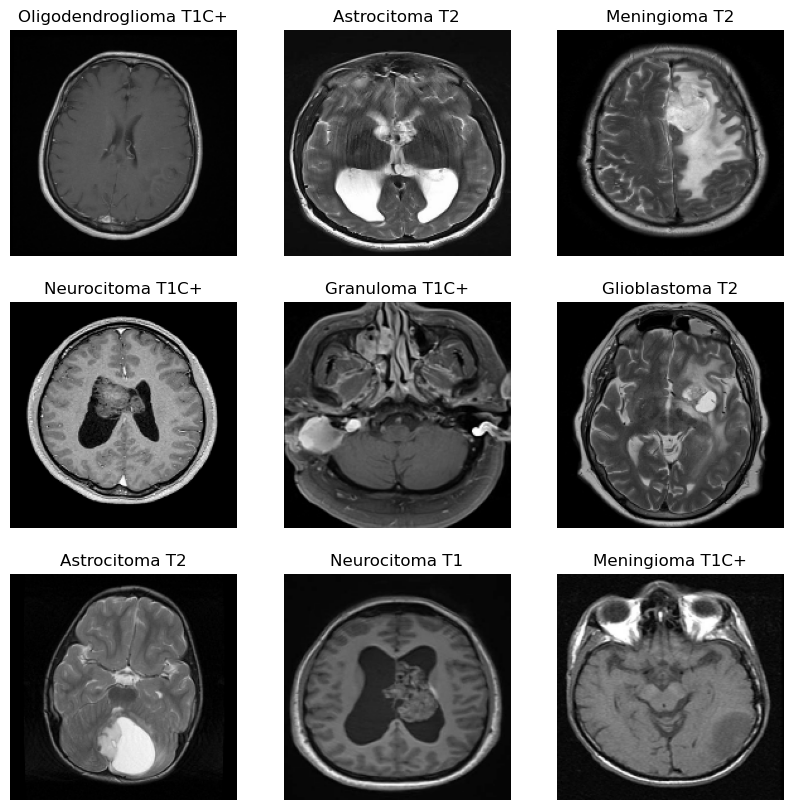

In [113]:
#predictions on test data 
# Retrieve a batch of images from the test set
image_batch, label_batch = test_ds.as_numpy_iterator().next()
predictions = model.predict_on_batch(image_batch)
# Apply softmax to convert logits to class probabilities
predictions = tf.nn.softmax(predictions, axis=-1)
# Get the predicted class labels by selecting the class with the highest probability
predicted_labels = tf.argmax(predictions, axis=-1)
# Define class names 
class_names = class_names
# Display the images along with their predicted class labels
plt.figure(figsize=(10, 10))
for i in range(9):  # Change the range to the number of images you want to display
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(image_batch[i].astype("uint8"))
    predicted_class = predicted_labels[i].numpy()
    plt.title(class_names[predicted_class])
    plt.axis("off")

plt.show()


## Save the model

In [115]:
#save the model
from tensorflow.keras.models import load_model

In [116]:
model.save(os.path.join('model','MRIBrainTumorClassification.h5'))